<a href="https://colab.research.google.com/github/anebawk/DS_Projects/blob/main/SLF_Project_LearnerNotebook_FullCode_Kwabena_Dwaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# loading the dataset and checking the first few rows
data = pd.read_csv('/Users/coby/Desktop/PGP-DSBA_Texas/Supervised Learning/LR Project/used_device_data.csv (1) (1).xls')

## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
# checking the first feww rows of the dataset
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


- Data has loaded properly and provided  information about various used or refurbished phones and tablets.

### Checking the shape of the dataset

In [ ]:
# checking the shape of the dataset
data.shape

(3454, 15)

- The dataset contains 3454 rows and 15 columns
* The dataset contains information (15 attributes) about 3454 used and refurbished phones

### Checking the data types of the columns for the dataset

In [ ]:
# checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the  normalized price of a used phone, which is of *float* type

### Statistical summary of the dataset

In [ ]:
# checking the statistical summary of the dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


 Observations
* We can see that prices of used phones and tablet  vary between 1.54 and 6.62 euros.
* The average pirce of used phones is 4.36 euros while 50% of phones were priced  4.76 euros
* *Others* is the most occurring type of brand.
* The release year of the phones ranges from 2013 to ~ 2020
* The top occuring OS is Andriod.
* Days used ranges form a minimun of 91 days to 1094 days.

### Checking for duplicate values

In [ ]:
# check if there are duplicates in the dataset
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in some  of the columns of the dataset.

In [ ]:
# creating a copy of the data so that original data remains unchanges
df=data.copy()

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along same scale
def histogram_boxplot(data, feature, figsize =(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe columns
    figsize: size of the figure(default(15,10))
    kde: whether to show a density curve(default False)
    bins: number of bins for the histogram(default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, # Number of rows of the subplot grid= 2
        sharex=True, # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )# creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="yellow"
    )# creating the boxplot with a triangle indicating the mean of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x= feature, kde=kde, ax=ax_hist2
    ) # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )# Indicating the mean of the histogram
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    ) # Indicating the median of the histogram

In [ ]:
# creating a function to label the barplots

def labeled_barplot(data,feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count(default is False)
    n: display the top n category levels(default is None, i.e., display all levels)
    """
    total = len(data[feature])# lenght of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+ 2, 6))
    else:
        plt.figure(figsize=(n+2, 6))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order= data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100*p.get_height()/total
            ) # percentage of each class of the category
        else:
            label = p.get_height()# count of each level of the category
        x = p.get_x() + p.get_width()/2 # with of the plot
        y = p.get_height()# height of the plot.

        ax.annotate(
            label,
            (x,y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) # annotate the percentage
    plt.show()


### normalized_used_price

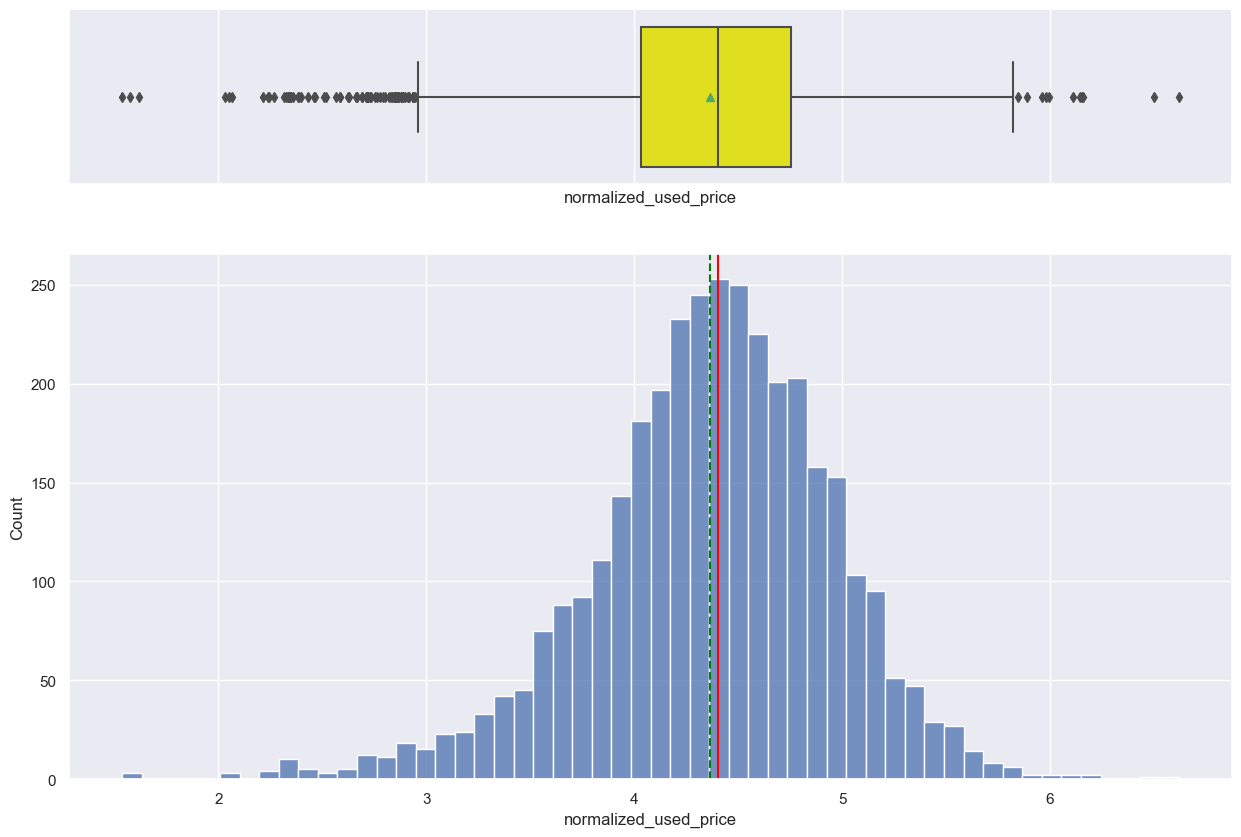

In [ ]:
# creating a histogram_boxplot for 'normalized_used_price'.
histogram_boxplot(df,"normalized_used_price")

- The distribution of normalized used price is close to normal with outliers on both sides.
- 50% of used phones and tablest cost less than 4.5 euros.
- The average used phone price is less than 4.4 euros.

### normalized_new_price

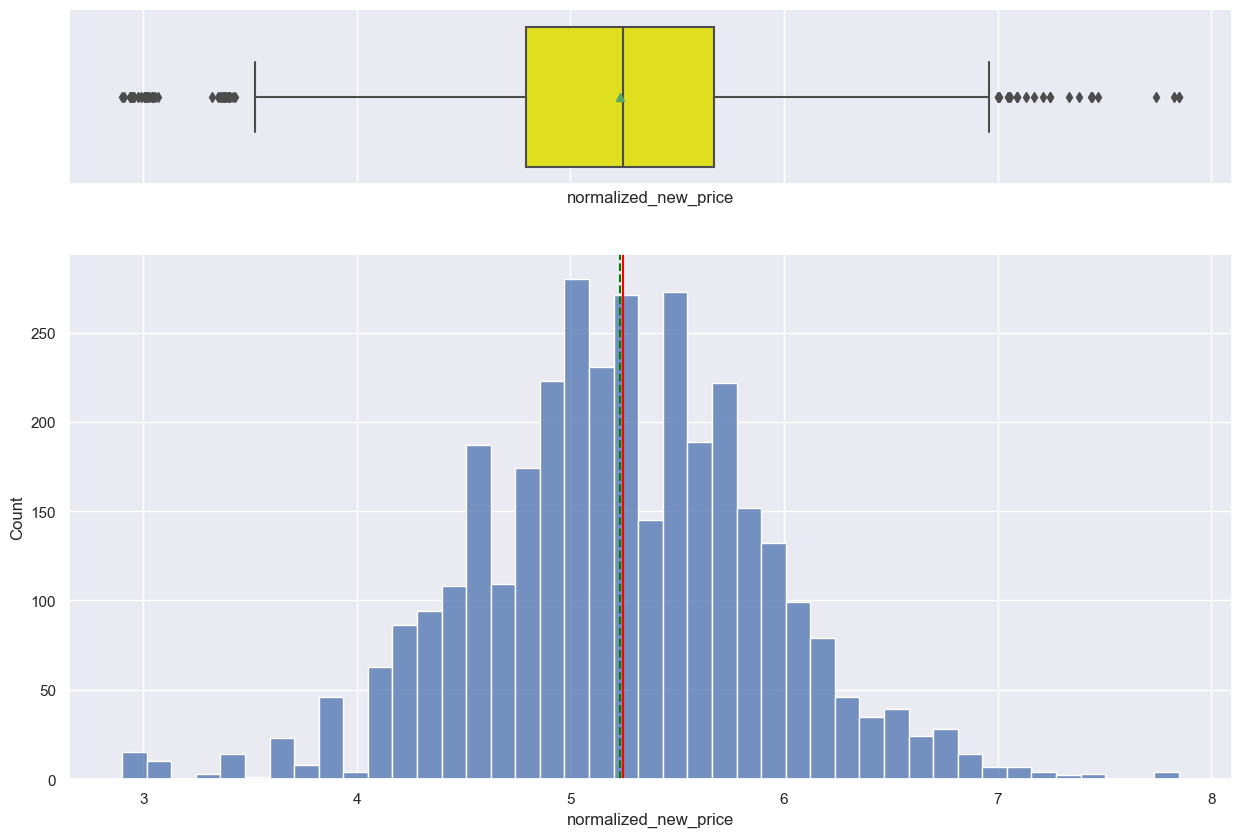

In [ ]:
# creating a histogram_boxplot for 'normalized_new_price'.
histogram_boxplot(df,"normalized_new_price")

- The distribution of normalized new price is also close to normal with outliers on both sides.

### screen_size

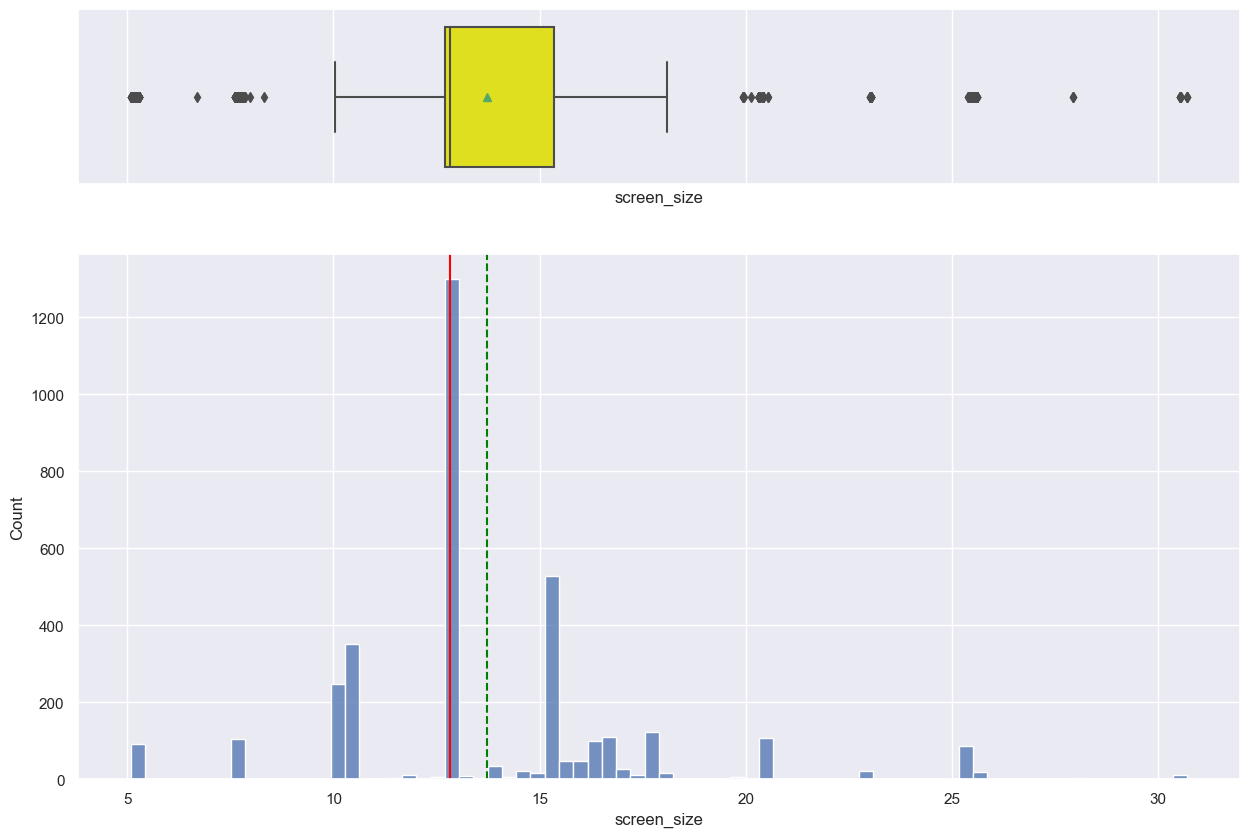

In [ ]:
# creating a histogram_boxplot for 'screen_size'.
histogram_boxplot(df,"screen_size")

- The distribution of "screen" right skewed and seems to be polymodal. The screen size of most phones is 14cm

### main_camera_mp

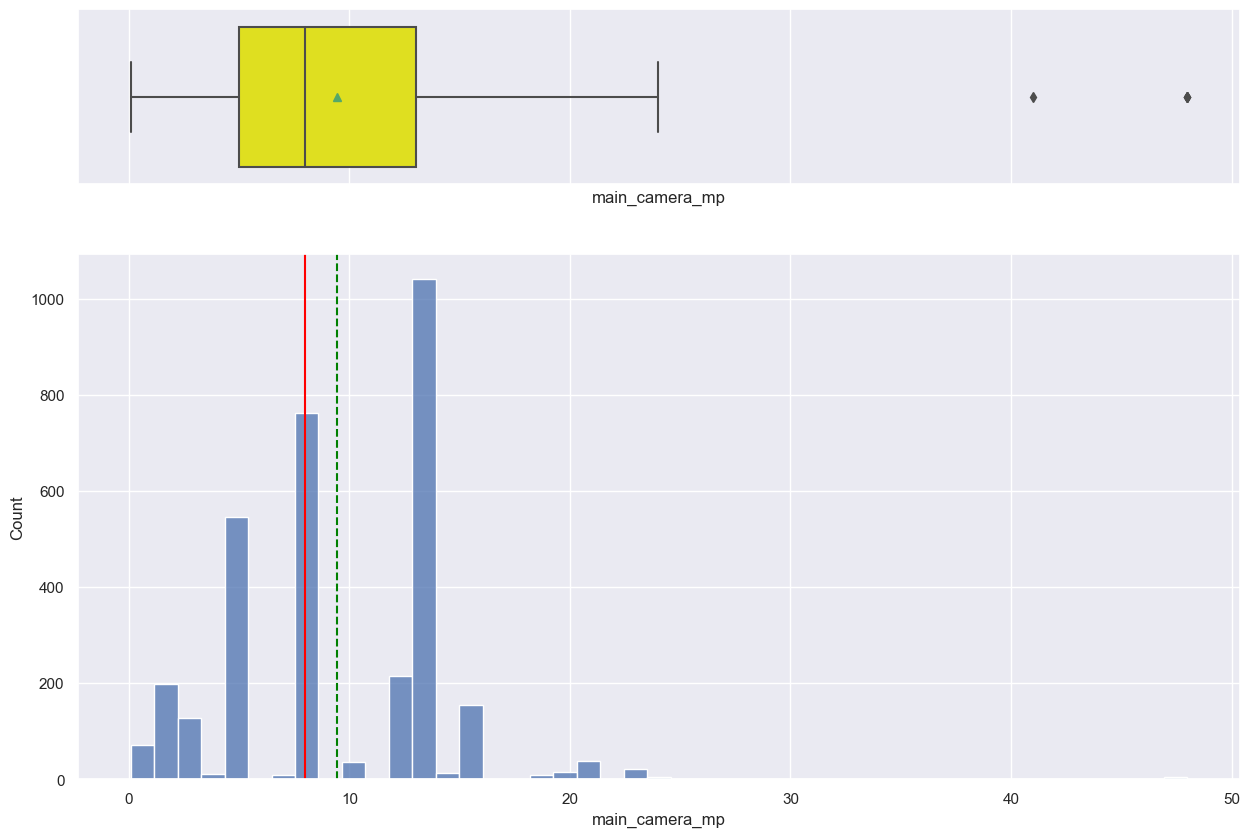

In [ ]:
# creating a histogram_boxplot for 'main_camera_mp'.
histogram_boxplot(df,"main_camera_mp")

- main camera has a right skewed distribution and also seem polymodal. 50% of the phones have cameras with 8             megapixels.

### selfie_camera_mp

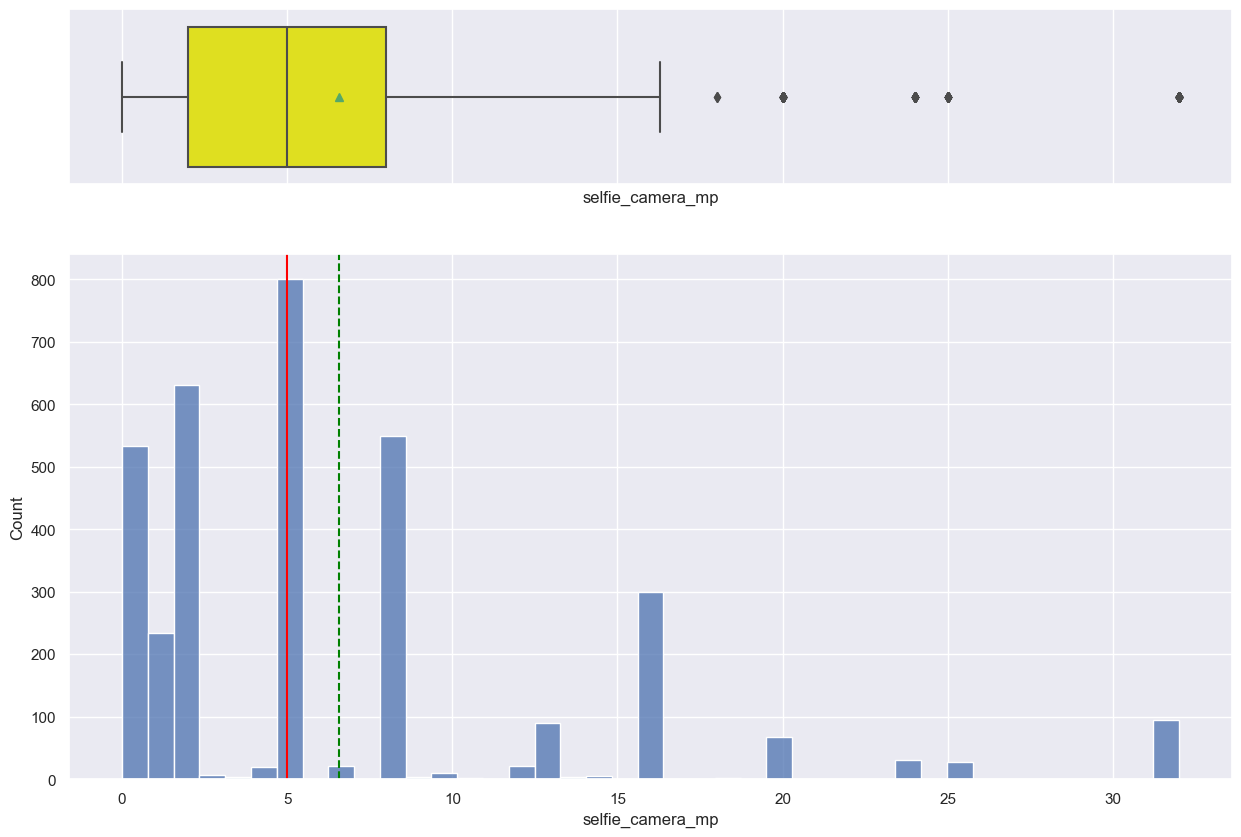

In [ ]:
# creating a histogram_boxplot for 'selfie_camera_mp'.
histogram_boxplot(df,"selfie_camera_mp")

- The distribution of selfie cameries is right skewed, the average selfie camera having less than 7 megapixels.

### int_memory

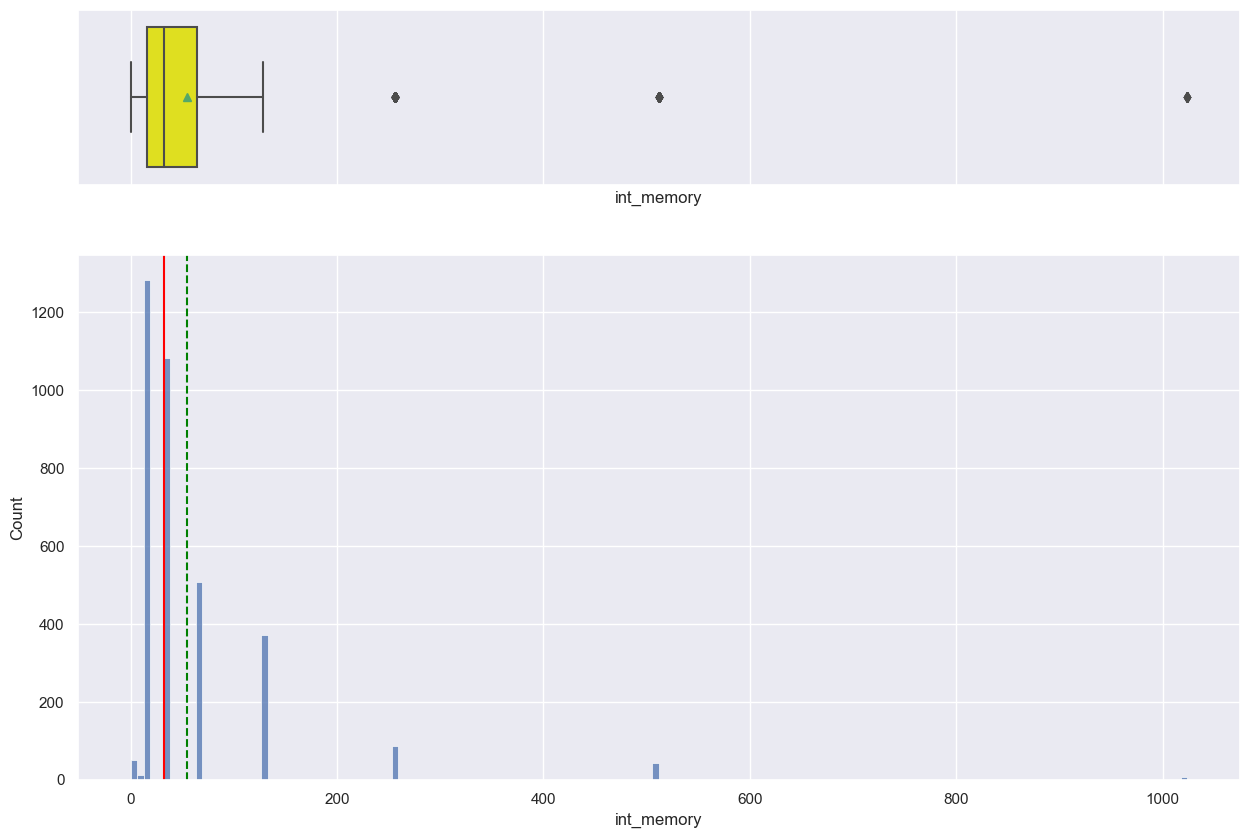

In [ ]:
# creating a histogram_boxplot for 'int_memory'.
histogram_boxplot(df,"int_memory")

 - The distribution of internal memory is right skewed.

In [ ]:
### ram

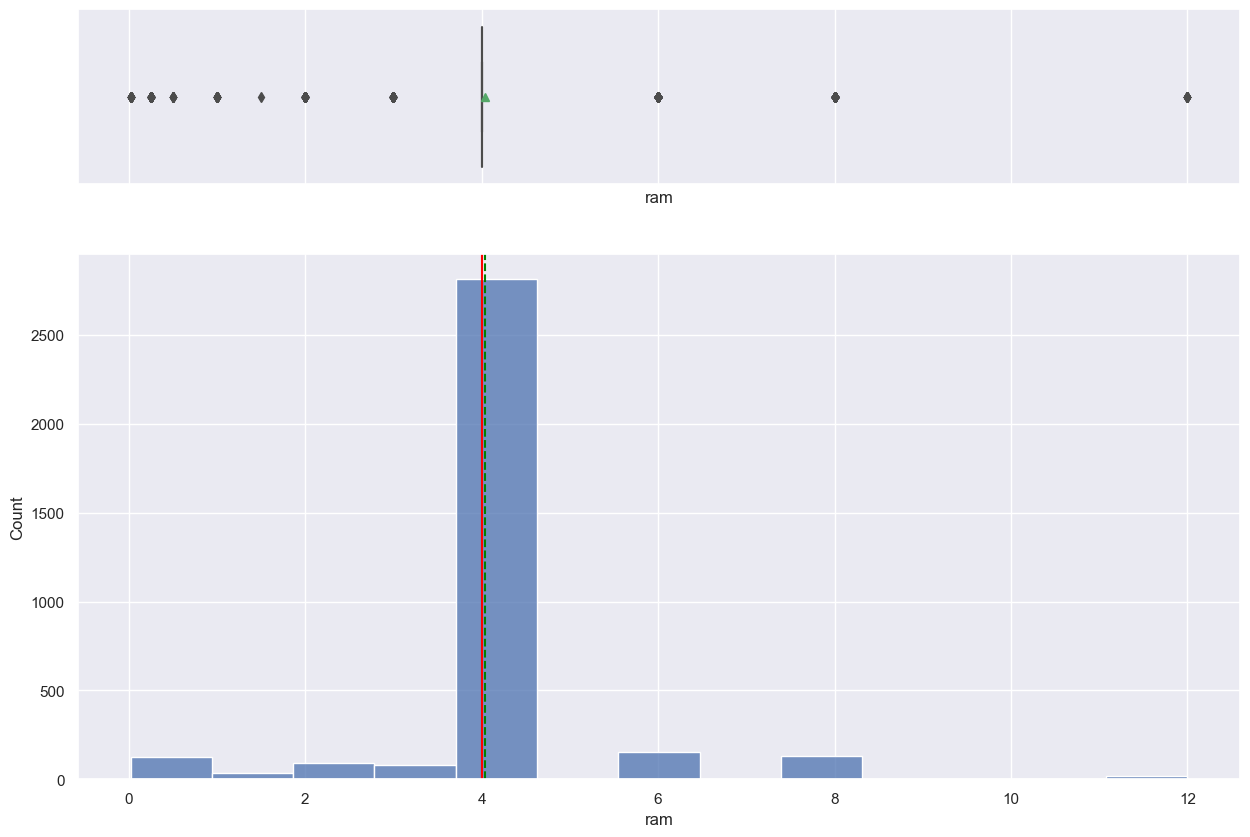

In [ ]:
# creating a histogram_boxplot for 'ram'.
histogram_boxplot(df,"ram")

- The distribution of ram seem normal and has flat tails. most of the used phone have ram of 4 GB

### weight

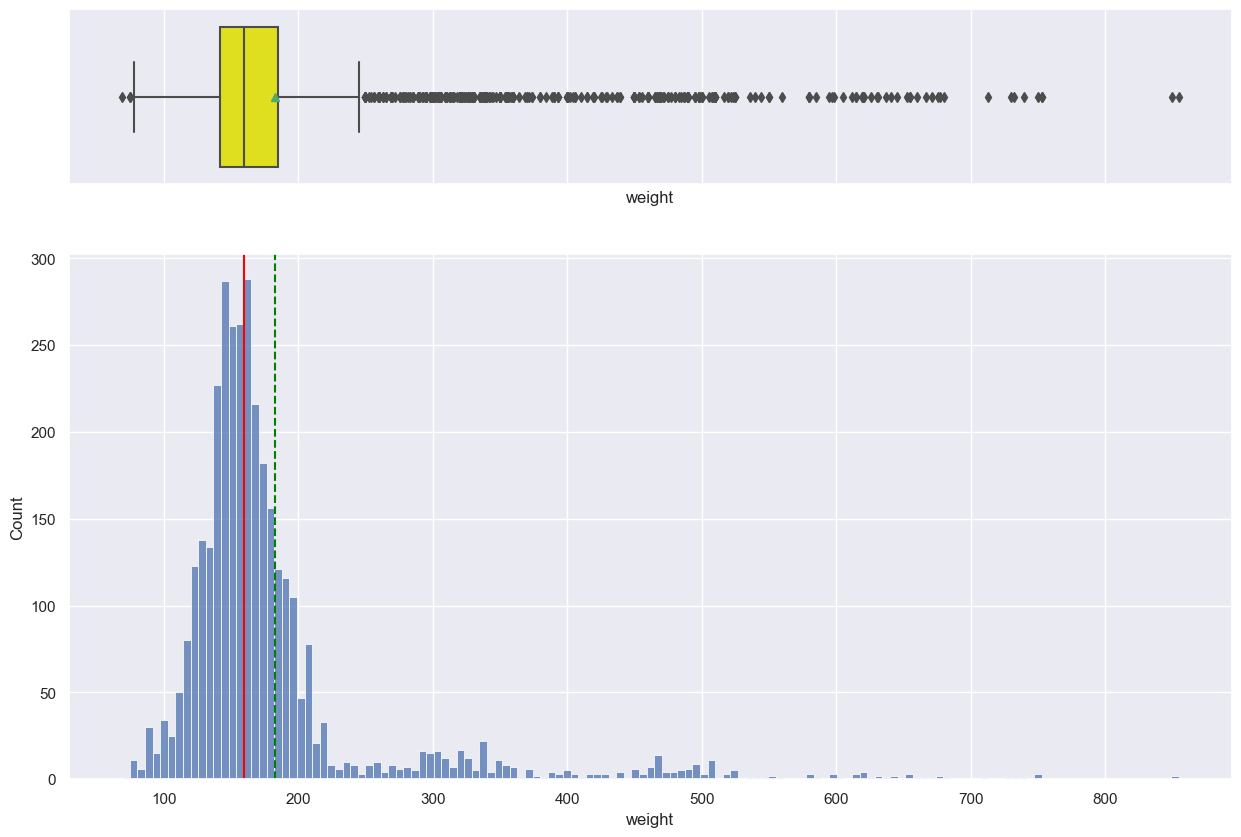

In [ ]:
# creating a histogram_boxplot for 'weight'.
histogram_boxplot(df,"weight")

The Distribution of camera Weight is right skewed.

### battery

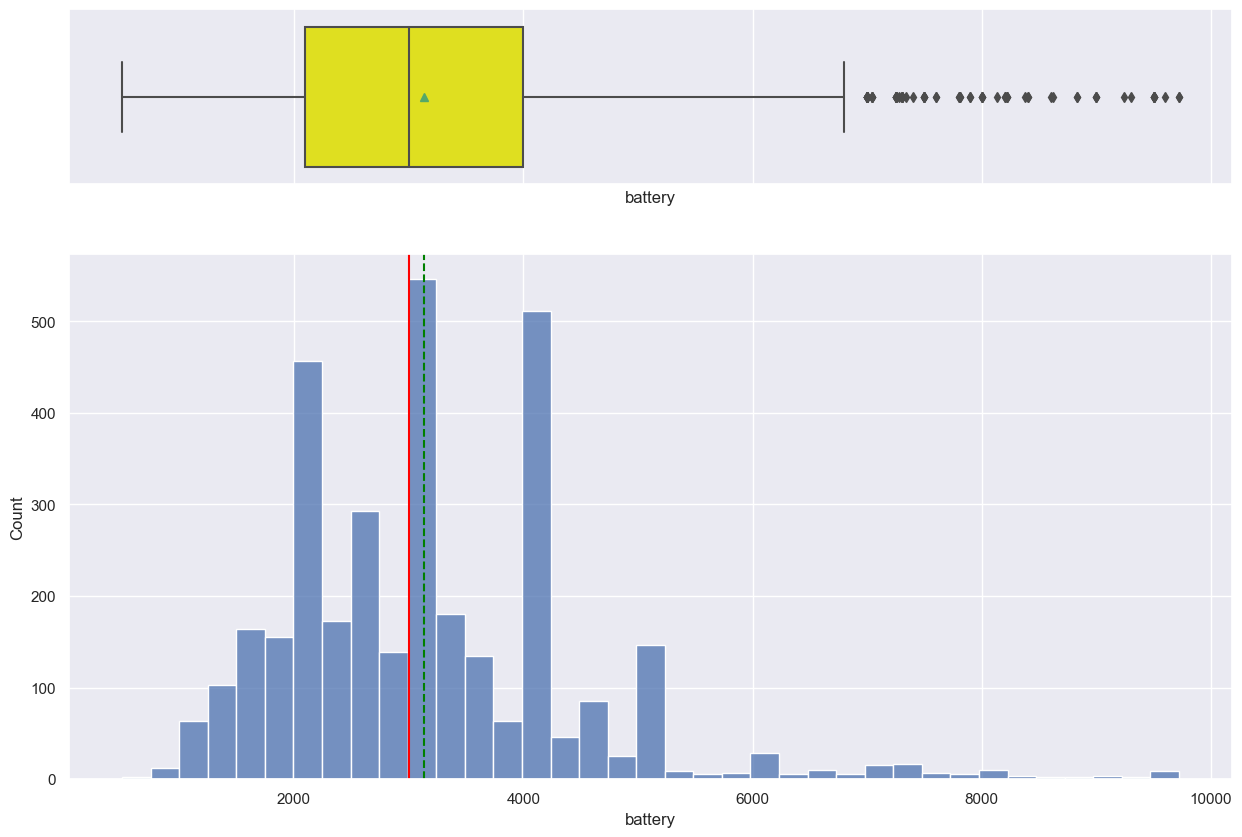

In [ ]:
# creating a histogram_boxplot for 'battery'.
histogram_boxplot(df,"battery")

- Battery has a close to  distribution with some skewness toward the right

### days_used

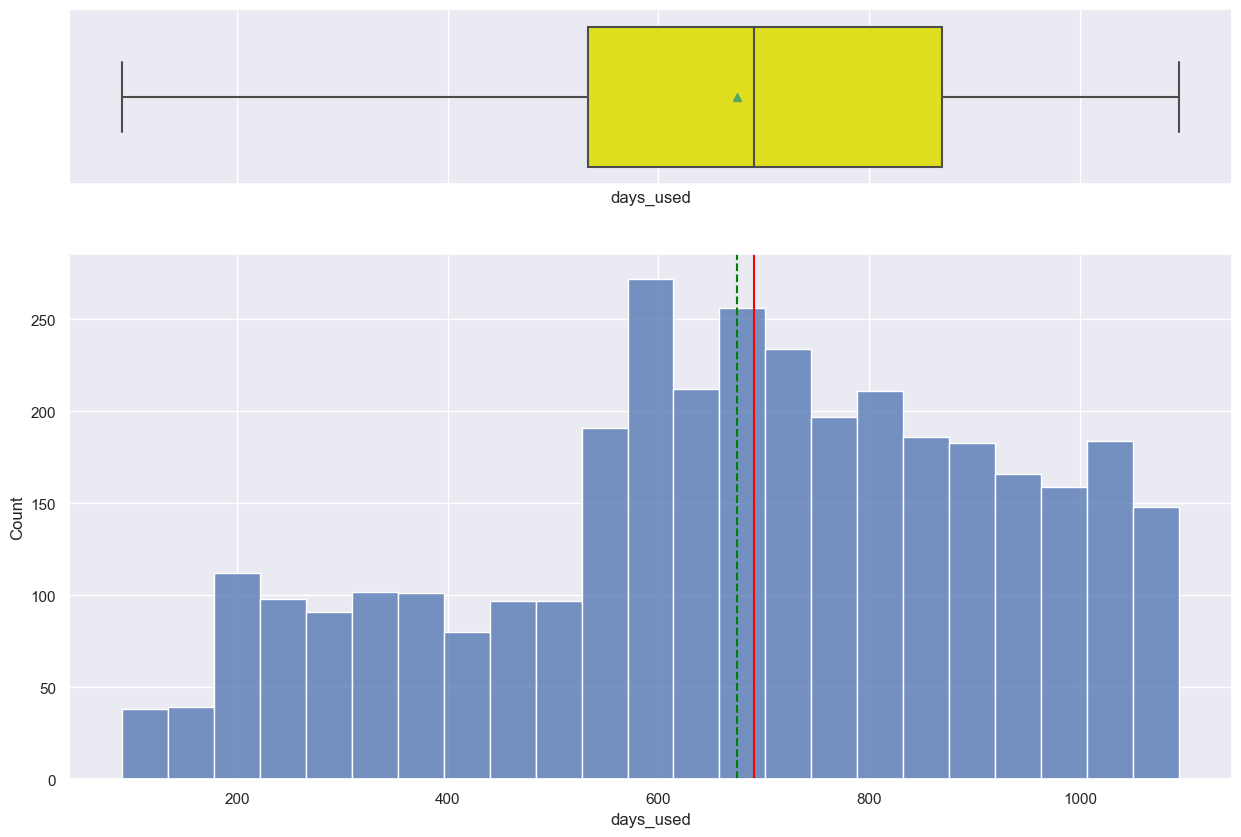

In [ ]:
# creating a histogram_boxplot for 'days_used'.
histogram_boxplot(df,"days_used")

* The Distribution for days_used is skewed to the left. 50% of the phone have been used for less than 700 days

### brand_name

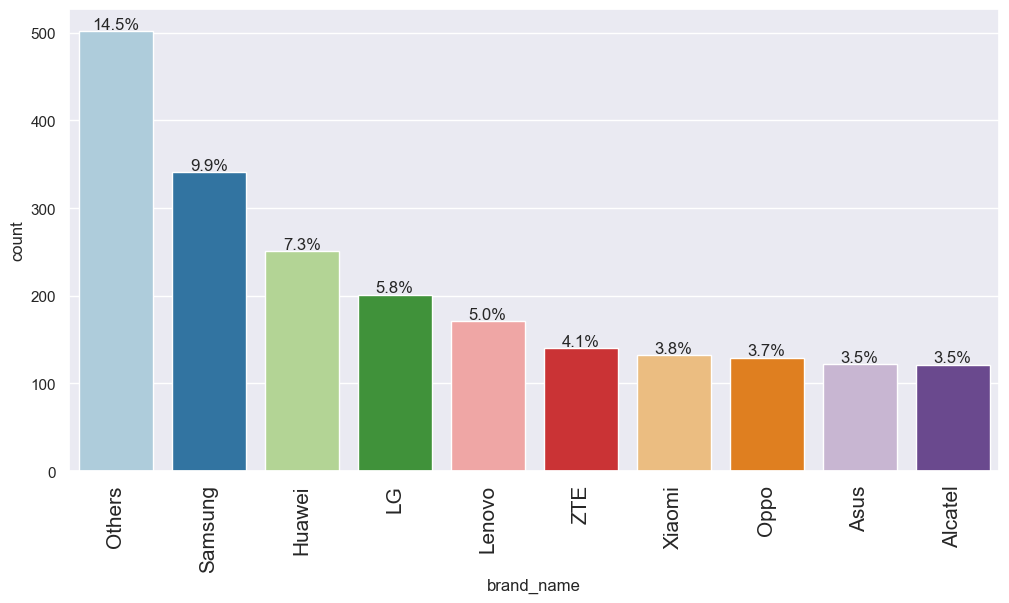

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

- Among the top ten  brands, 'others' has the highest number representing 14.5%. This is followed by Samsung with 9.9%   with Huawei as the third hiegest at 7.3%.
- Acatel and Asus has the lowest number representing 3.5% each


### os

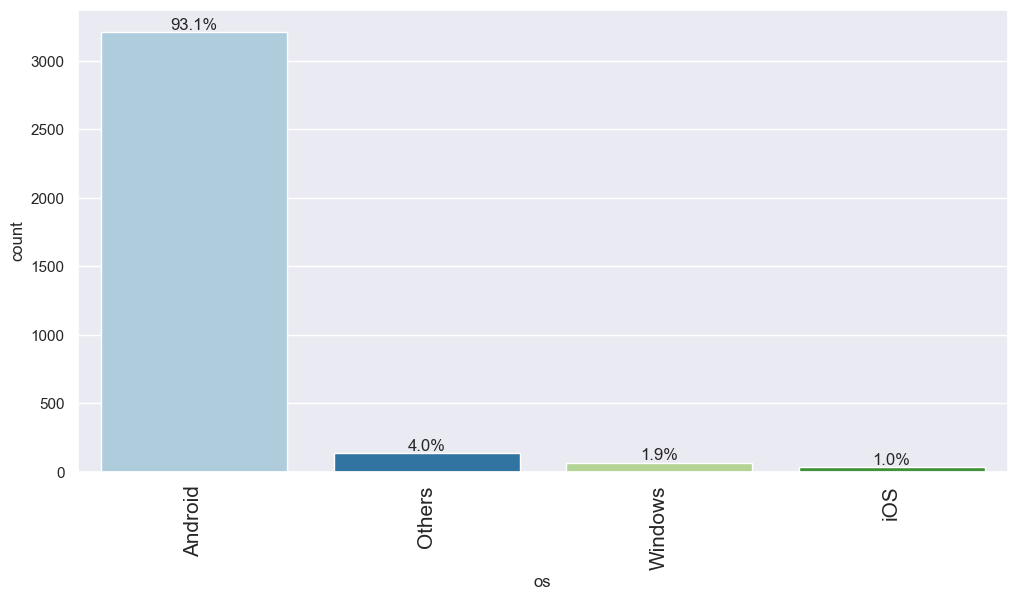

In [ ]:
labeled_barplot(df, "os", perc=True, n=10)

- Among the operating systems "os", 93.1% are Android, 4% are others, 1.9% are windows whiles 1.0% are ios phones.

### 4g

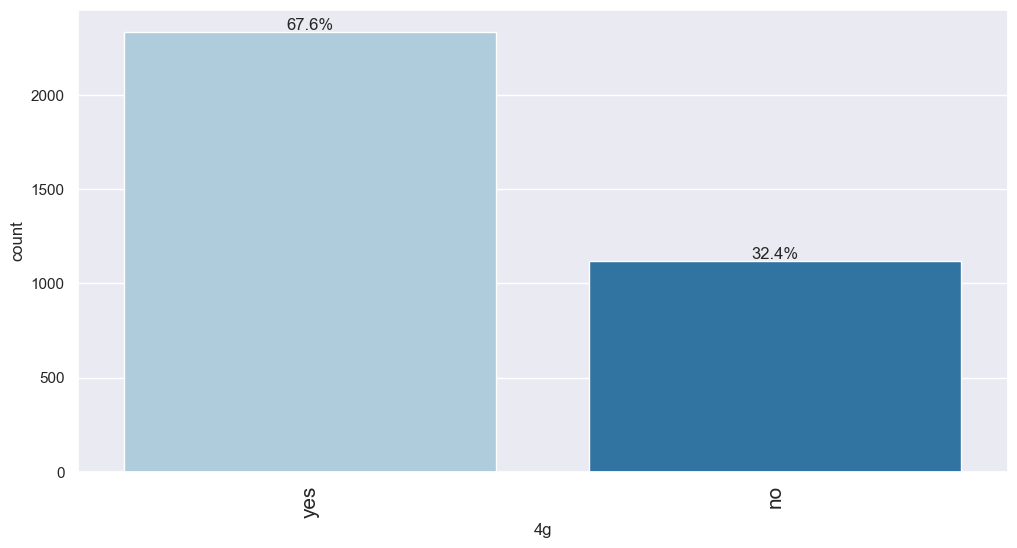

In [ ]:
labeled_barplot(df, "4g", perc=True, n=10)

- 67.6% of the phones ran on 4g whiles the remaining 34.4% are not 4g network phone

### 5g

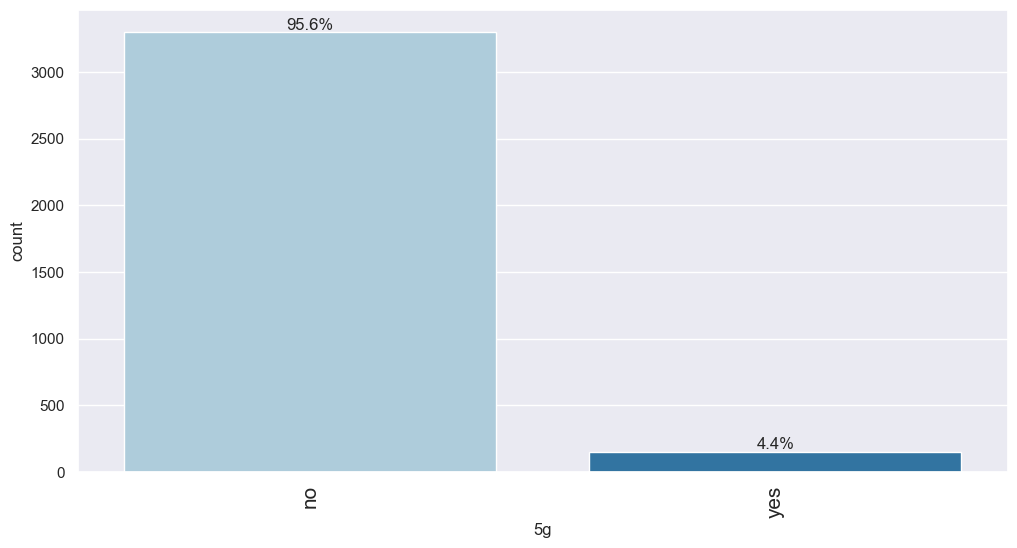

In [ ]:
labeled_barplot(df, "5g", perc=True, n=10)

- Only 4.4% percent runs on 5g whiles remaining 95.6% do not.

### release_year

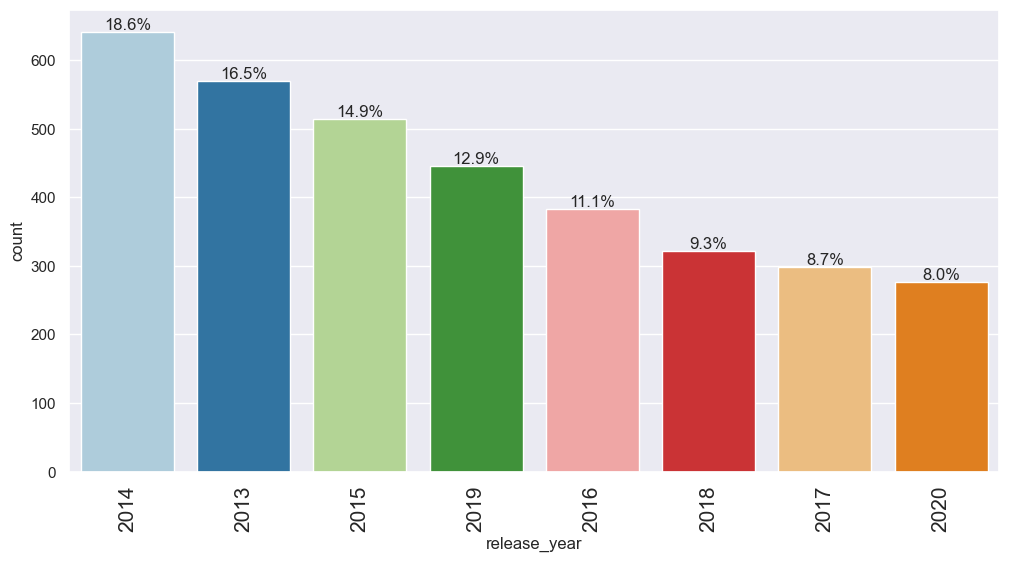

In [ ]:
labeled_barplot(df, "release_year", perc=True, n=10)

- 18.6% of the phone were release in the year 2014 which is the highest. This is followed by 16.5% in 2013 and 2015 with   14.9%.
- The year with the lowest number of phones released is 2020 reprsenting 8.0%.

## Bivariate Analysis

### How does the RAM varies across brands ?

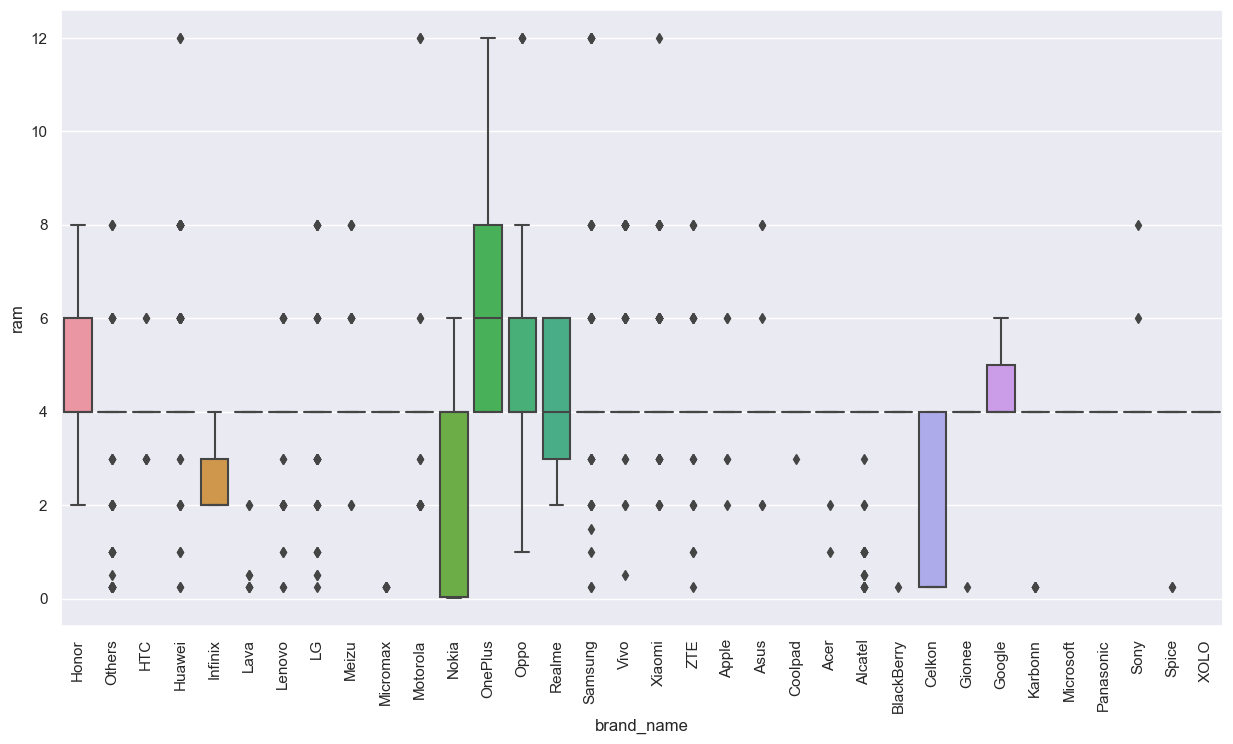

In [ ]:
plt.figure(figsize=(15, 8))# defining the figure size
sns.boxplot(data=df,x='brand_name',y='ram') # ploting boxplots for the various brands and ram
plt.xticks(rotation=90)
plt.show()

- Most brands have average ram size of 4GB.
- As we can see 50% of all OnePlus phones have ram size of 6GB which is the highest among all brands
- The median ram of infinix phones is 2GB which is the lowest among all brands.

### How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
df_battery_above4500 = df.loc[df['battery']>4500]# extracting devices with more than 4500 mAh.
df_battery_above4500.shape

(341, 15)

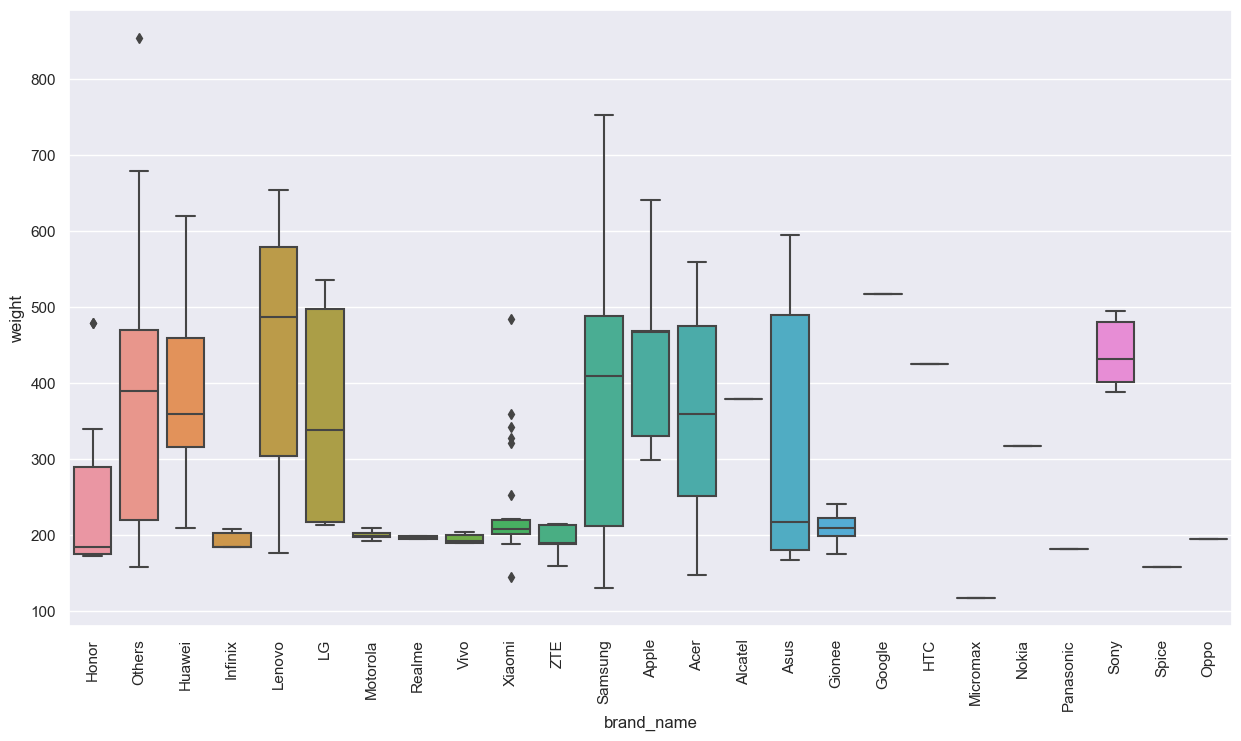

In [ ]:
plt.figure(figsize=(15, 8))# defining the figure size
sns.boxplot(data=df_battery_above4500,x='brand_name',y='weight') # ploting boxplots for the various brands and ram
plt.xticks(rotation=90)
plt.show()

- There are 341 phones and tablets with battery power greater than 4500
- Micromax has the least weight with less than 150 grams on the average among device with battery power of more than     4500
- The heaviest is Lenovo with 50% of it's devices weighing close to 500 grams

### How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
# converting inches to centimentres
a = 6*2.54
# creating a new dataframe for devices with screensize larger than 6 inches
df_larger_screen = df.loc[df['screen_size'] > a]
df_larger_screen.shape

(1099, 15)

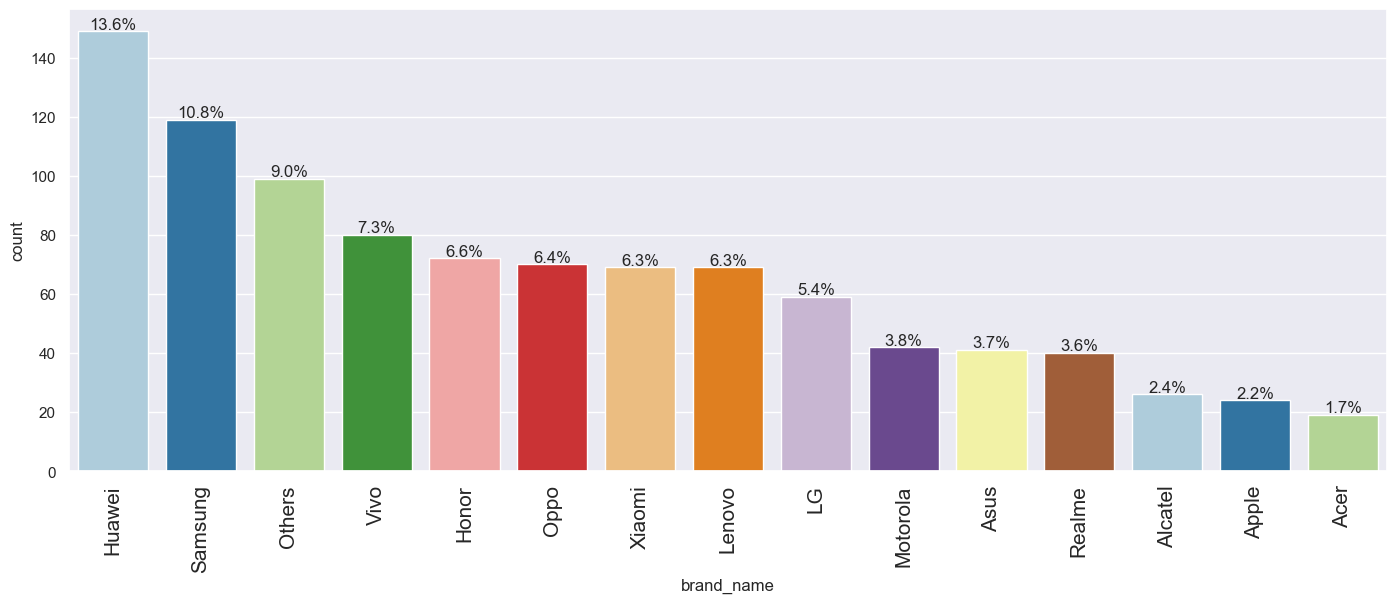

In [ ]:
# creating a labeled_boxplot for brand_name with larger screen size.
labeled_barplot(df_larger_screen,"brand_name", perc=True, n=15)

- There are 1099 phones and tablets having a screen size larger than 6 inches.
- Among the top 15 brands with larger screen size, Huawei is on top 13.6%. This is follwed   by Sumsung with 10.8% and   'others' with 9.0%
- The least among the the top 15 brands with screen size larger the 6 inches  are  Accer, Apple and Acatel               representing 1.7%, 2.2% and  2.4% respectively

### What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
# creating a new dataframe for devices with selfie carmera higher than 8MP
df_selfie_camera = df.loc[df['selfie_camera_mp'] > 8]
df_selfie_camera.shape

(655, 15)

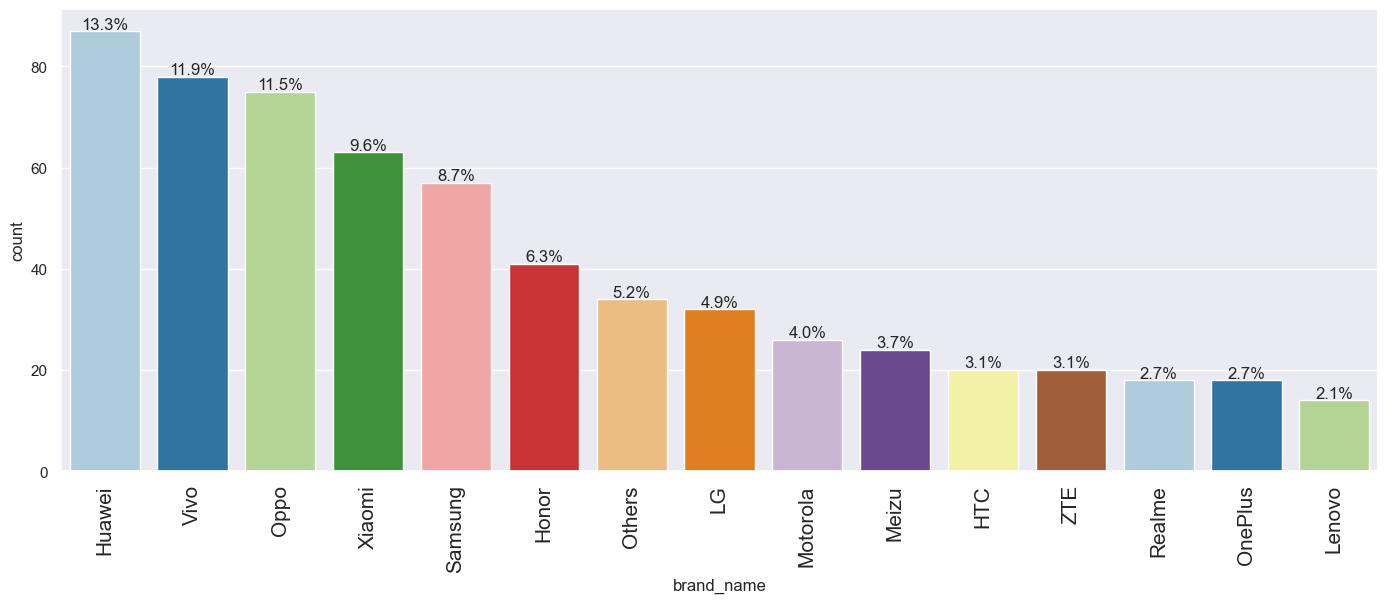

In [ ]:
# creating a labeled_boxplot for brand_name with high selfie screen.
labeled_barplot(df_selfie_camera, "brand_name", perc=True, n=15)

- There are 655 devices in the data set with selfie camera megapixels higher than 8MP
- Topmost brands are Huawei, Vivo, Oppo representing 13.3%, 11.9% and 11.5 respectively.
- The least among top 15  are Lenovo OnePlus and Realme representing 2.1%, 2.7% and 2.7 respectively

### Checking for correlation and  which attributes are higly correlated with normalized price of a used device?

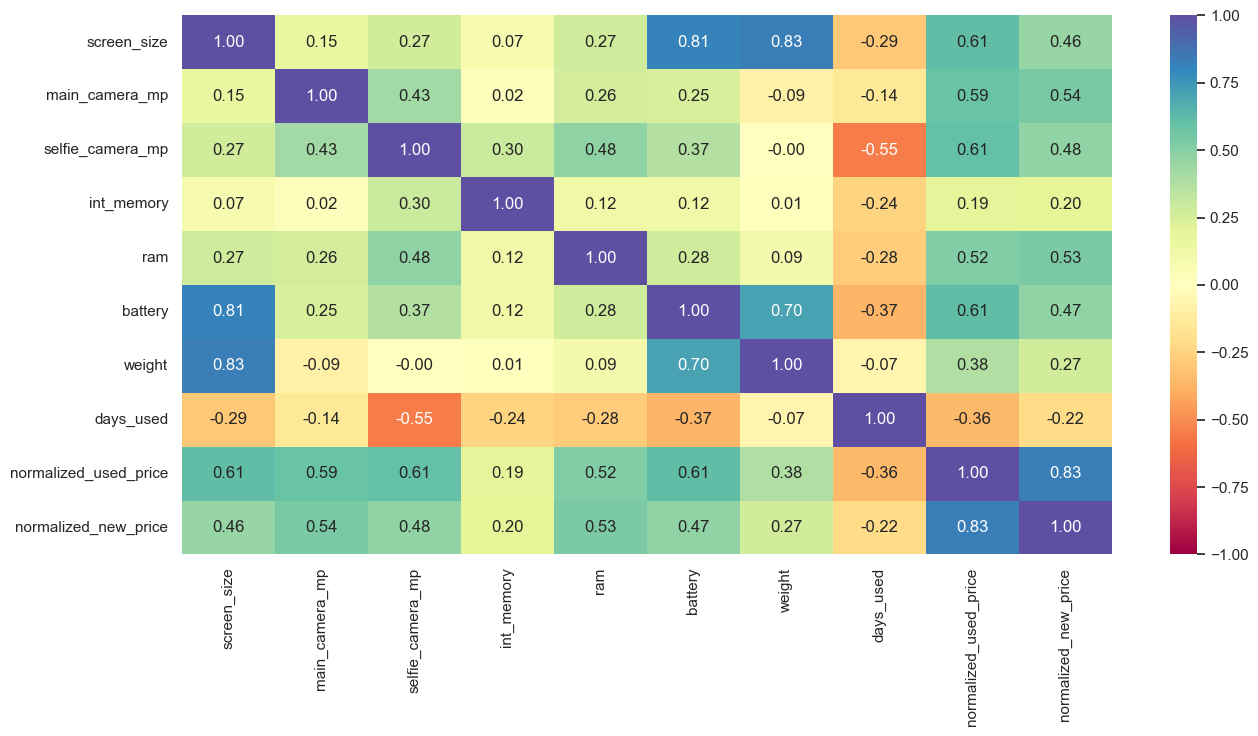

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()# creating a list to columns.
cols_list.remove("release_year")# droping release year from the columns
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Normalized used pirce has higer correlationt to normalized_new_price(0.83), battery(0.61), ram(0.52),                 selfie_camera_mp(0.61), main_camera_mp(0.59) and screen_size(0.61)

### Prices of used devices over the years

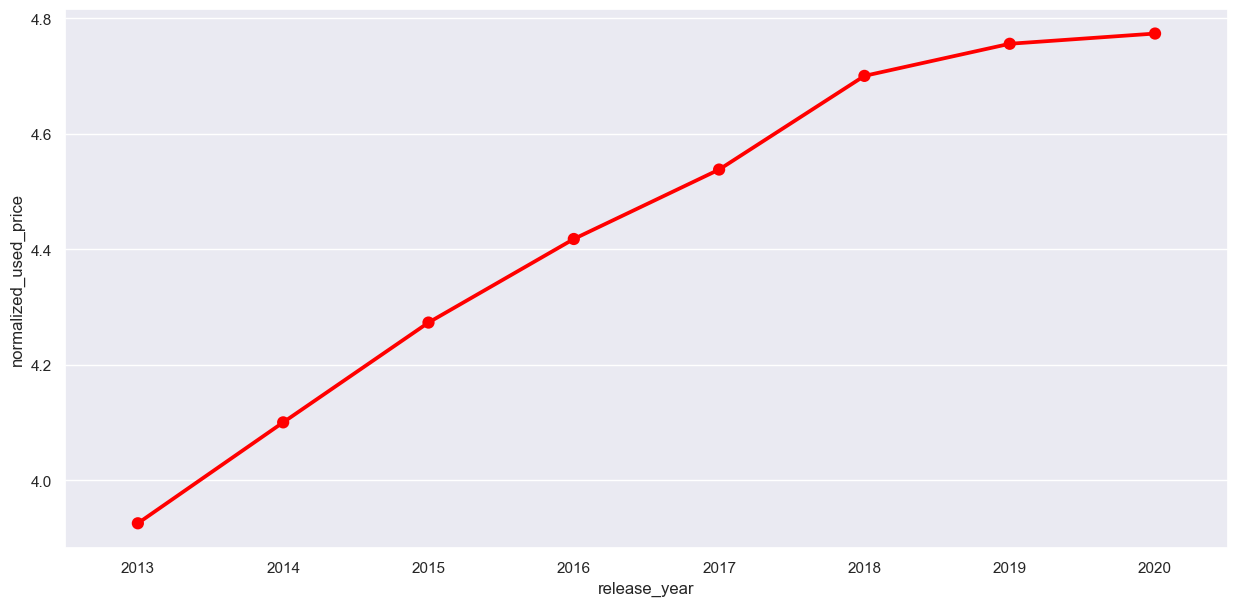

In [ ]:
# making a plot to visualized the trend of used prices of devices over the years.
plt.figure(figsize=(15, 7))# defining the size of the graph.
sns.pointplot(data=df, x="release_year",y='normalized_used_price',ci=False,color="red")# plotting the graph
plt.show()

- Over the years normalized used prices of devices have increase steadily from under 2 euros in 2013 to as high as       almost 4.8 euros in 2020

### How prices vary for used phones and tablet with 4G and 5G Network?

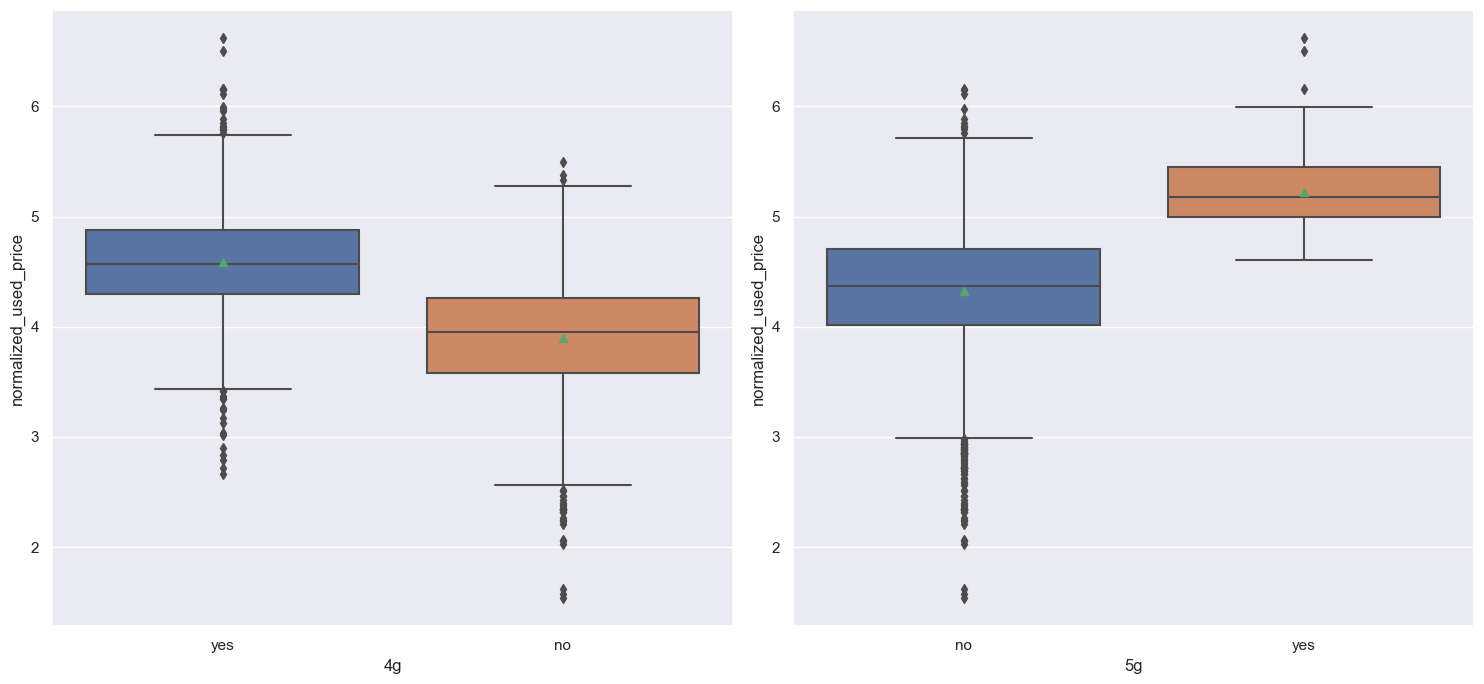

In [ ]:
# creat a list for 5g and 4g columns
col_vars= ["4g","5g"]
# creat figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axs= axs.ravel()

# creat boxplot for each of the variable
for i, var in enumerate(col_vars):
    sns.boxplot(data=df, x=var, y="normalized_used_price",showmeans=True, ax=axs[i])

# adjust spaceing between subplots
fig.tight_layout()

plt.show()

- The average price of phones offering 4g network is 4.5 euros whiles those without 4g network is almost 4 euros.
- The average price of phones offering 5g network is 5.2 euros whiles those without 4g network is around 4.3 euros.

## Data Preprocessing

### Missing value treatment

In [ ]:
#creating a copy of the data to avoid changes to it
df1 = df.copy()

In [ ]:
#checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight"
]
# imputing missing values in cols_impute with median by groping the data by release year and brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )
# checking missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["release_year"])["main_camera_mp"].transform("median")
)
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature engineering

In [ ]:
# creating a new column 'age' form the release_year using 2021(the of data collection)as the baseline
df1["years"] = 2021 - df["release_year"]

# will drop release_year column
df1.drop("release_year", axis=1, inplace=True)
df1["years"].describe()


count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years, dtype: float64

- years devices have been in existance ranges from 1 to 8 years with 5.035 as the average.

### Outlier detection and treatment

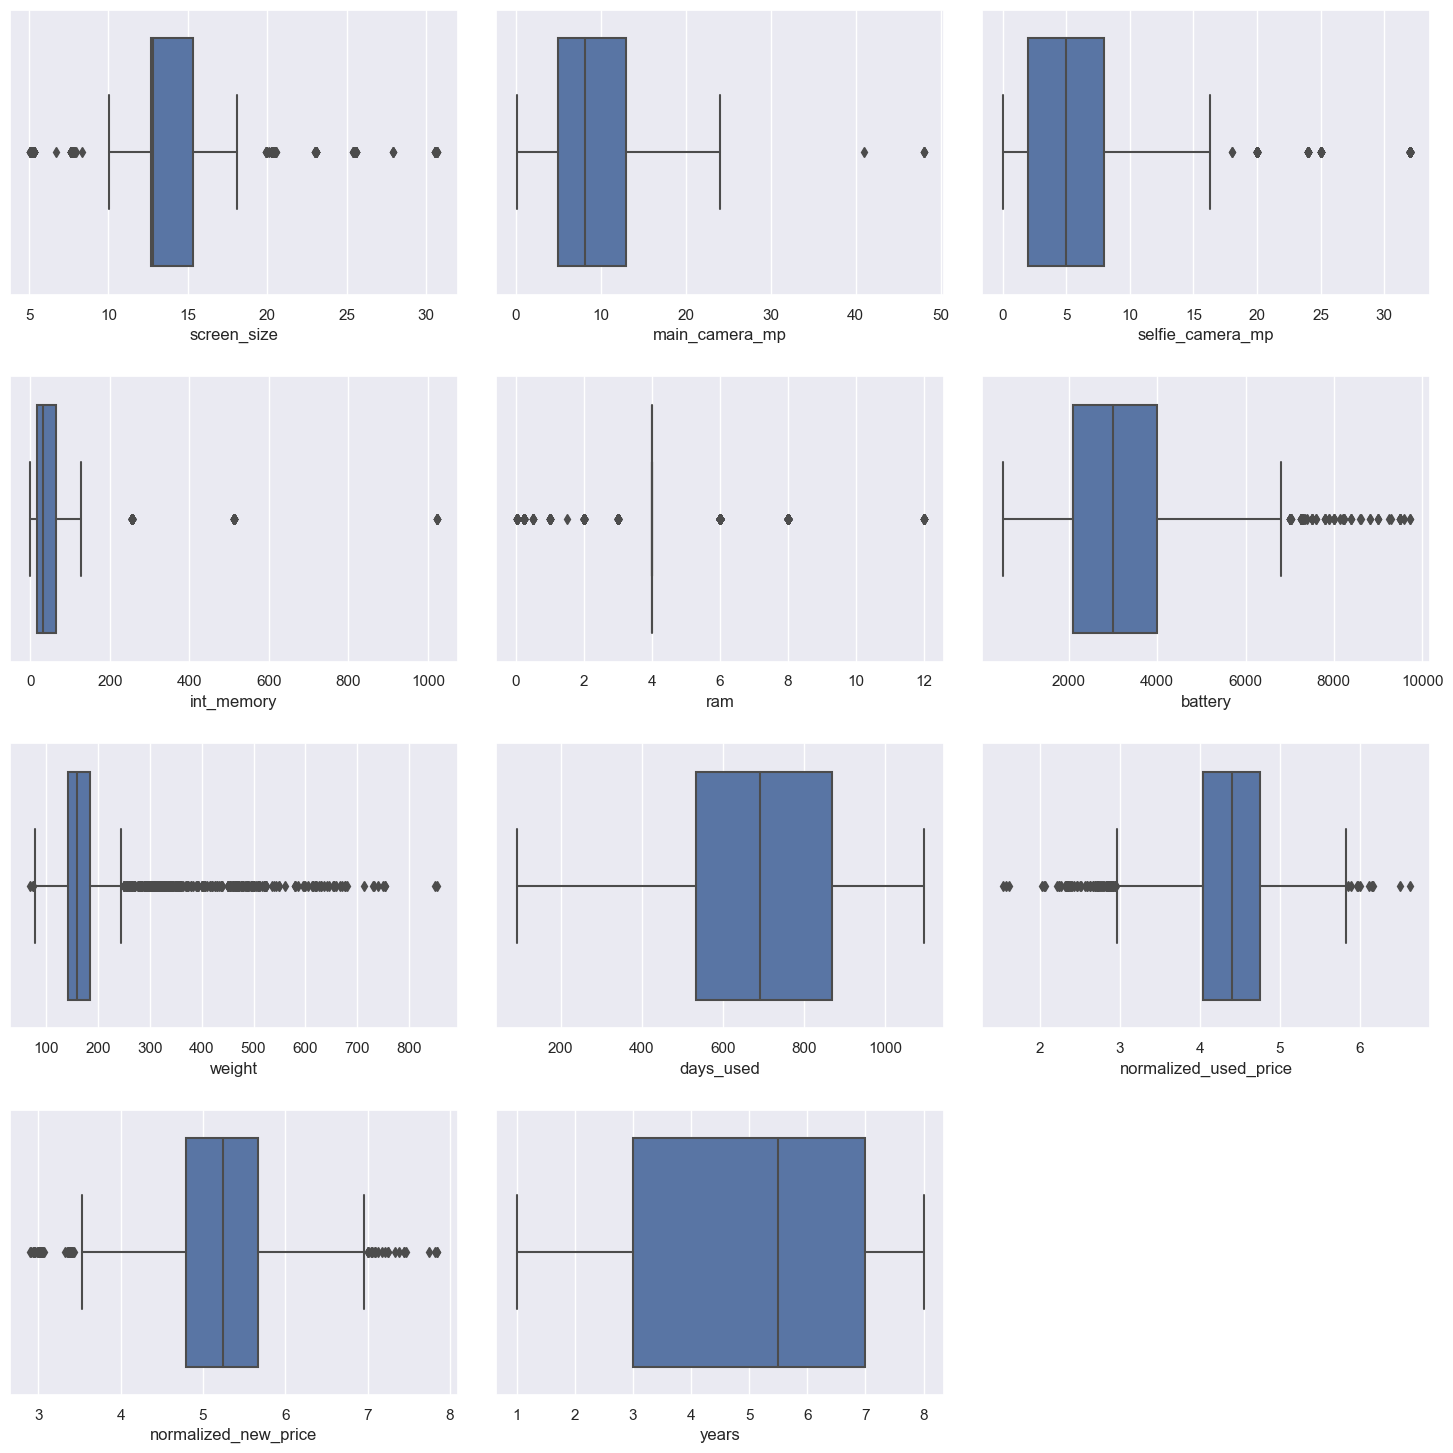

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)
plt.show()

There are outliers in the data
However, we will not treat them as they are proper values

### Preparing data for modeling

In [ ]:
# define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis =1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years  
0              4.715100      1  
1              5.519018      1  
2              5.884631      1  
3              5.630961      1  
4              4.947837      1  
0    4.3

In [ ]:
# adding the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the code to create dummies for independent features

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                           08:42:37   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3158**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

In [ ]:
# function to compute adjusted R-squred
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1- ((1 - r2)*(n - 1)/(n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions)/ targets) * 100

# function to compute different metrics to check performance of regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check performance of regression model

    model: regressor
    predictors: independent variables
    targets: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred) # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred) # to computed adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))# to compute RMSE
    mae = mean_absolute_error(target, pred)# to compute MAE
    mape = mape_score(target, pred)# to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-Squared": adjr2,
            "MAPE": mape

        },
        index=[0]
    )
    return df_perf


In [ ]:
# checking models performance on the train set(seen 70% data)
print("Training performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel1_train_perf

Training performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.229856,0.180302,0.844924,0.841713,4.326213


In [ ]:
# checking models performance on the test set(seen 30% data)
print("Test performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel1_test_perf

Test performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.238482,0.184868,0.842315,0.834487,4.505694


**Observations**

- The training $R^2$ is 0.845, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict `normalized_used_price` within a mean error of 0.185 on the test data

- MAPE of4.5 on the test data means that we are able to predict within 4.5% of the normalized used price

## Checking Linear Regression Assumptions

### Test for multicollinearity

In [ ]:
# checking the variance inflation factor for all the predictor variables
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.678565
1,screen_size,7.677118
2,main_camera_mp,2.287763
3,selfie_camera_mp,2.810716
4,int_memory,1.364057
5,ram,2.255246
6,battery,4.081715
7,weight,6.397183
8,days_used,2.660002
9,normalized_new_price,3.119569


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [ ]:
# treating multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838427,0.234670
1,weight,0.838102,0.234906


In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.629212
1,main_camera_mp,2.284524
2,selfie_camera_mp,2.807324
3,int_memory,1.361996
4,ram,2.255245
5,battery,3.842940
6,weight,2.993841
7,days_used,2.648681
8,normalized_new_price,3.078112
9,years,4.729654


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                           08:42:38   Log-Likelihood:                 98.289
No. Observations:                   2417   AIC:                            -100.6
Df Residuals:                       2369   BIC:                             177.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

- We can see that adj. R-squared has dropped from 0.845 to 0.842, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing high p-values

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     897.2
Date:                   Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                           08:42:39   Log-Likelihood:                 82.411
No. Observations:                   2417   AIC:                            -134.8
Df Residuals:                       2402   BIC:                            -47.97
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.233859,0.18256,0.839475,0.838472,4.390362


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.241426,0.18662,0.838398,0.836024,4.556014


* Now adjusted R-squared is 0.839, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.838
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867687,0.219801
1525,4.448399,4.601952,-0.153553
1128,4.315353,4.287419,0.027933
3003,4.282068,4.194820,0.087249
2907,4.456438,4.489671,-0.033233


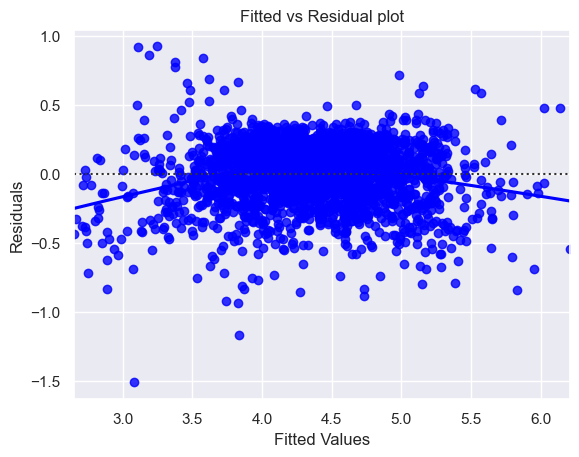

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="blue", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

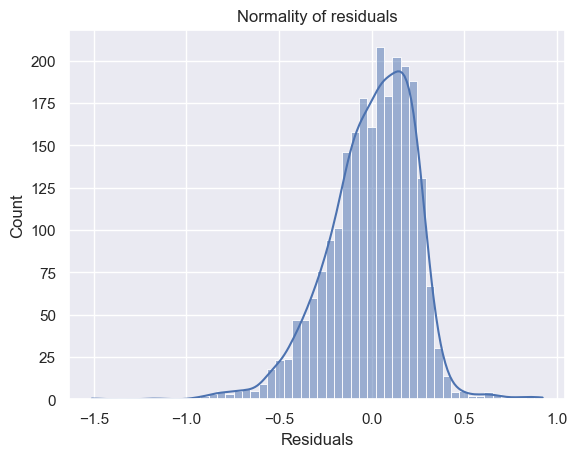

In [ ]:
# to plot the distribution of the residual
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

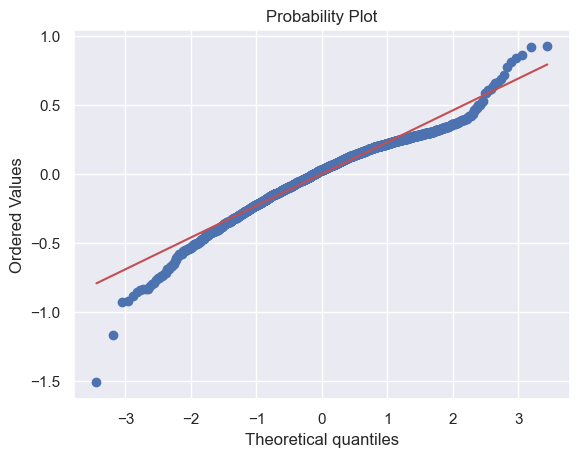

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9677574634552002, pvalue=7.333805701923077e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0088452876616931), ('p-value', 0.4395565291744592)]

*Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.*

### Predictions on test data

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385913
2341,3.696103,4.004256
1913,3.592093,3.644146
688,4.306495,4.103571
650,4.522115,5.113063
2291,4.259294,4.398655
40,4.997685,5.460415
1884,3.875359,4.053132
2538,4.206631,4.036105
45,5.380450,5.227059


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [ ]:
### Let's recreate the final model and print it's summary to gain insights.
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     897.2
Date:                   Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                           08:42:40   Log-Likelihood:                 82.411
No. Observations:                   2417   AIC:                            -134.8
Df Residuals:                       2402   BIC:                            -47.97
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.233859,0.18256,0.839475,0.838472,4.390362


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-Squared,MAPE
0,0.241426,0.18662,0.838398,0.836024,4.556014


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.6% of the normalized used price.

* Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

1. The model is able to explain ~84% of the variation in the data and within 4.6% of the normalized used price on the    test data, which is good
    *This indicates that the model is good for prediction as well as inference purposes

2. If the main camera mp of a phone increases by one unit, then its normalized used price  increases by 0.0211 units,    all other variables     held constant
3. If selfie camera mp of a phone increases by one unit, then its normalized used price increases  by 0.0138 units,      all other variables held constant
4. If  the number years of a phone increases by one unit, then its  normalized used price decreases by 0.0288  units,    all other variables held constant
5. If ram of a phone increases by one unit, then its normalized used price increases  by 0.0215 units, all other          variables held constant
6. The normalized used price for the brand Karbonn will be 0.1156 units higer than that of the brand Acer.
7. As the normalized used price increase with an increase in both main camera and selfie camera megapixels , the          company can improve its marketing activities to promote phones with both  main and selfie cameras having  higher      megapixels.
8. As the normalized use price increase with an increase in its ram, the company can look to sell more phones with        higer ram in GB.
9. ReCell can look to increase the number of phones  such as Huawei and Vivo as they are the brands with higest          highest selfie  cameras. For device with bigger ram ram size they should look at increasing the sales of OnePlus      since this increaes the normalized used price of phones and tablets.
10. Recell can gather data about brands like cost, selling prices, sales region, to further anlyse which phone are         more profitable and those that are not profitable.

___